#### Variable Notes
 - Survival	0 = No, 1 = Yes
 - pclass	Ticket class (A proxy for socio-economic status (SES))	1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
 - Sex	
 - Age in years	
 - sibsp	# of siblings / spouses aboard the Titanic	
     - Sibling = brother, sister, stepbrother, stepsister
     - Spouse = husband, wife (mistresses and fiancés were ignored)
 - parch	# of parents / children aboard the Titanic	
     - Parent = mother, father
     - Child = daughter, son, stepdaughter, stepson
     - Some children travelled only with a nanny, therefore parch=0 for them.
 - ticket	Ticket number	
 - fare	Passenger fare	
 - cabin	Cabin number	
 - embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [42]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('titanic_train.csv')
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
data.drop(columns=['Cabin'],axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
data.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [12]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [15]:
#declare and train
col = ['Pclass', 'Age', 'SibSp', 'Parch',
        'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[col]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [16]:
#model
logreg = LogisticRegression(max_iter=1000)
logreg_fit = logreg.fit(X_train,y_train)
y_pred = logreg_fit.predict(X_test)
y_pred_proba = logreg_fit.predict_proba(X_test)

In [17]:
logreg_fit.score(X_test,y_test)

0.7921348314606742

In [41]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[82 20]
 [20 56]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       102
           1       0.76      0.75      0.75        76

    accuracy                           0.79       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.79      0.79      0.79       178



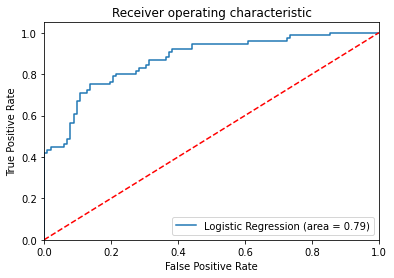

In [33]:
#False positive analysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [34]:
#logit summary2 results
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.504457
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.249     
Dependent Variable: Survived         AIC:              554.7596  
Date:               2021-03-25 11:28 BIC:              589.0027  
No. Observations:   534              Log-Likelihood:   -269.38   
Df Model:           7                LL-Null:          -358.73   
Df Residuals:       526              LLR p-value:      3.6666e-35
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass         0.1111    0.1133   0.9800  0.3271  -0.1111   0.3332
Age           -0.0061    0.0069  -0.8824  0.3775  -0.0197   0.

In [35]:
#reselect values based on p-values rejection rate
col2 = ['SibSp', 'Fare', 'Sex_male']
X = data[col2]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

logreg = LogisticRegression(max_iter=1000)
logreg_fit = logreg.fit(X_train,y_train)
y_pred = logreg_fit.predict(X_test)
y_pred_proba = logreg_fit.predict_proba(X_test)

In [36]:
logreg_fit.score(X_test,y_test)

0.7752808988764045

In [43]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[82 20]
 [20 56]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       102
           1       0.74      0.74      0.74        76

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



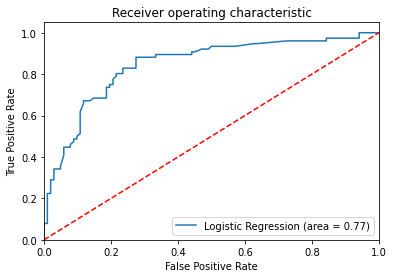

In [93]:
#False positive analysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The score is 0.77. We dropped 5 variables from the first test, avoided multicolinearity and the score only dropped by ~0.02. The accuracy score from the classification report decreased by .01 on the second model. The AUC curve looks like a standard one. The most significant variables are the gender of persons, number of siblings or size of family, and the fare paid in the surviving the Titantic crash. 

In [100]:
data[col2].describe()

,SibSp,Fare,Sex_male
count,712.000000,712.000000,712.000000
mean,0.514045,34.567251,0.636236
std,0.930692,52.938648,0.481420
min,0.000000,0.000000,0.000000
25%,0.000000,8.050000,0.000000
50%,0.000000,15.645850,1.000000
75%,1.000000,33.000000,1.000000
max,5.000000,512.329200,1.000000


Lets predict how I will fair in the Titanic based on the 3 variables. I am a grown male, traveling by myself and overpaid for my ticket ($100) to have a good time. 

In [103]:
me = {'SibSp':0, 'Fare':100, 'Sex_male': 1} #no siblings, $100 ticket, 1 for male
me = pd.DataFrame(me, index=[0])
me_pred = logreg_fit.predict(me)
me_prob = logreg_fit.predict_proba(me)

In [115]:
print('Did I make it? {}. Probability of surviving {}'.format(me_pred[0],round(me_prob[0,1],3)))

Did I make it? 0. Probability of surviving 0.467


Almost made it. Of course, these results are 0.78 accurate. 